# ML com Árvores de Decisão

Nesse notebook vamos criar nossos primeiros modelos estatísticos usando **árvores de decisão**, aprender sobre diferentes estratégias de aprendizado e tipos de modelos, como classificadores e regressores.

In [21]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (8.0, 5.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Frutas

In [22]:
fruits_x = [[150, "rugosa", "laranja"],
            [170, "rugosa", "verde"],
            [140, "lisa", "vermelha"],
            [130, "lisa", "vermelha"],
            [136, "lisa", "verde"]]

fruits_y = ["laranja", "laranja", u"maça", u"maça", u"maça"]

`fruits_x` são as nossas features (as vezes chamadas de atributos)

`fruits_y` é o nosso target, ou seja, o que queremos inferir/prever a partir de X (também chamado de label)

Antes de treinar nosso modelo, temos que fazer todas **nossas features serem numéricas**, pois é o formato esperado pelos algoritmos do `sklearn`:

In [23]:
fruits_x = [[150, 0, 0],
            [170, 0, 1],
            [140, 1, 2],
            [130, 1, 2],
            [136, 1, 1]]

Nosso modelo já aprendeu as melhores regras para distinguir maças e laranjas. Agora podemos classificar novos objetos que não conhecíamos antes:

Nosso objeto `dt` é o que chamamos de um **modelo**. Ele foi treinado usando um algoritmo de árvores de decisão. Poderíamos ter usado outro algoritmo, que apesar de funcionar de forma diferente, também aprenderia regras para prever novos dados:

## Regressão

E se quisermos prever um valor contínuo, como a altura do filho dada a altura do pai:

In [28]:
heights_x, heights_y = utils.load_heights()

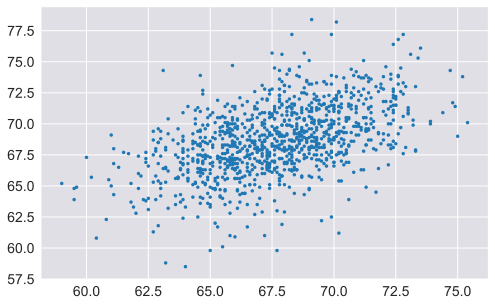

In [29]:
plt.plot(heights_x, heights_y, '.')

In [49]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(heights_x, heights_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
reg.predict([[79]])

array([ 74.49926763])

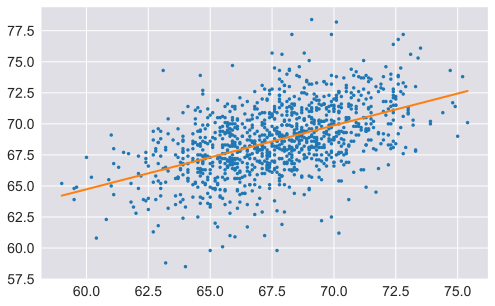

In [51]:
plt.plot(heights_x, heights_y, '.')
plt.plot(heights_x, reg.predict(heights_x))

## Preço da região

Ou então queremos prever estimar o preço de uma região dada suas características:

In [52]:
features = ["crime", "rio", "industrial", "#quartos", "av-mais-proxima"]

neighs_x = [[  0.37,  1,  10.59,  6.40,   4],
            [  0.82,  0,   3.97,  7.32,   5],
            [  0.53,  0,   3.97,  7.52,   5],
            [  0.05,  0,   4.49,  6.63,   3],
            [ 15.28,  0,  18.1 ,  6.64,  24],
            [ 13.52,  0,  18.1 ,  3.86,  24],
            [  6.05,  0,   4.49,  6.38,   3],
            [  0.31,  0,   6.2 ,  8.26,   8],
            [  1.27,  1,  19.58,  6.25,   5],
            [ 35.74,  0,  18.1 ,  4.51,   4],
            [ 10.14,  0,  10.01,  5.73,   6],
            [  4.54,  0,  18.1 ,  6.39,  24]]

prices_y = [39300,  
            31000,  
            43100,  
            26600,  
            13900,  
            15100,  
            23900,
            44800,  
            27000,   
             7000,  
            19300,  
            25000]

In [53]:
some_neigh = [5,  0,   5.0,  4,   3]

## Usando Árvores de Decisão

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

### Dataset Iris

Esse dataset contém medidas da largura e comprimento da pétula e da sépala de 150 amostras de flores, assim como a espécie de cada uma (versicolor, setosa, virginica).

![oranges_apples_ilustracao.png](../images/iris.png)

Vamos carregar o dataset e treinar uma árvore de decisão nos nossos dados.

In [58]:
x, y, species = utils.load_flowers()

Vamos definir um conjunto `x_test` para testarmos nosso algoritmo. Os primeiros? Aleatórios?

Agora como podemos avaliar se nosso modelo é preciso? Vamos definir uma métrica simples chamada acurácia, que basicamente é a porcentagem de valores para os quais previmos a classe certa:

In [57]:
accuracy(y_test, y_pred)

Porém esse número parece confiável? Basicamente ele diz que nosso classificador é perfeito e sempre acerta a espécie da flor. Vamos dar uma olhada na nossa árvore:

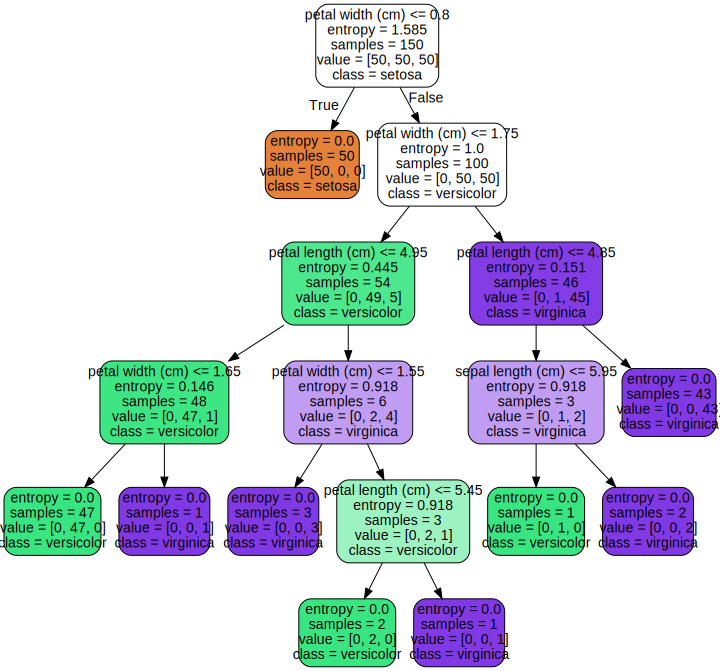

In [48]:
dot_data = export_graphviz(dt,
                           out_file=None, 
                           feature_names=x.columns,
                           class_names=species,  
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Podemos observar que, a medida que aprofundamos na árvore, alguns nós muito específicos aparecem. Muitos nós separam somente um exemplo da nossa base. É difícil de acreditar que, dentre 150 amostras, uma regra que separa somente 1 exemplo seja de fato algo logicamente (nesse caso, biologicamente) válido.

Assim, para termos uma estimativa melhor do desempenho do nosso algoritmo, vamos reservar uma parte dos dados que não serão usados no treino, mas somente na avaliação (ou como chamamos, no teste).

## Exercício: Cancer de mama

Nesse exemplo vocês vão treinar uma árvore de decisão para classificar se um tumor é benigno ou maligno. O que deve ser feito:

* Liste os atributos/features do problema.
* Calcule a média, desvio padrão, minimo e máximo de cada atributo (dica, pandas tem um método muito conveniente para isso).
* Observe se o problema é balanceado (o que é isso mesmo? e por que isso é relevante?)
* Separe um conjunto de teste e um de treino (quanto pra cada?)
* Escolha uma métrica de avaliação e avalie o classificador no conjunto de treino e teste.
* Plote a árvore treinada.

In [35]:
x, y, target_names = utils.load_dataset('cancer')

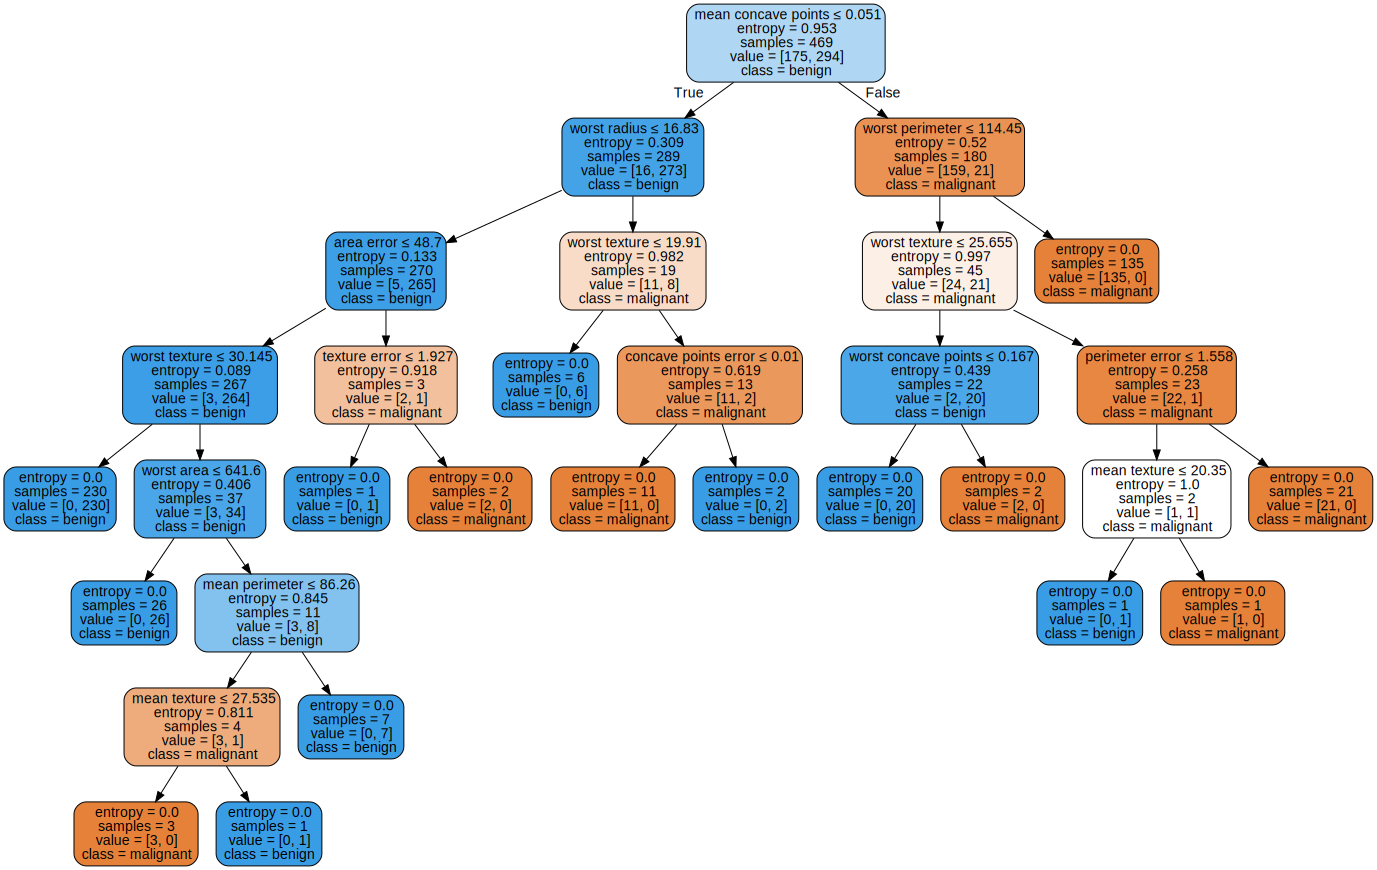

In [58]:
dot_data = export_graphviz(dt, 
                           out_file=None,
                           feature_names=x.columns,
                           class_names=target_names,
                           filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)

## Overfitting e Underfitting

### Exercício

Usando os dados acima de cancer de mama, você deve:

* Treinar vários modelos variando o valor do parâmetro `max_depth` entre 1 e 10
* Plotar um gráfico com duas curvas, `max_depth vs acurácia` no conjunto de treino, `max_depth vs acurácia` no conjunto de teste.

Dicas: para os plots, use o método pronto `plot_accs(values, accs_train, accs_test, param_name)`.

In [61]:
def plot_accs(values, accs_train, accs_test):
    plt.plot(values, accs_train, label='train')
    plt.plot(values, accs_test, label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Max Depth')
    plt.legend()


depths = list(range(1, 10))

for depth in depths:
    dt = DecisionTreeClassifier(random_state=1, max_depth=depth)
#     ...

    
# plot_accs(values, accs_train, accs_test)

Podemos perceber que o desempenho no conjunto de teste cai a medida que o modelo fica mais complexo tentando se adequar ao conjunto de treino (valores maiores de `max_depth`)

## Melhores parâmetros

In [41]:
dt = DecisionTreeClassifier(max_depth=?, random_state=87)
dt.fit(xtrain, ytrain)

print('Acurácia no treino:', accuracy(ytrain, dt.predict(xtrain)))
print('Acurácia no teste:', accuracy(ytest, dt.predict(xtest)))

Acurácia no treino: 0.980810234542
Acurácia no test: 0.95


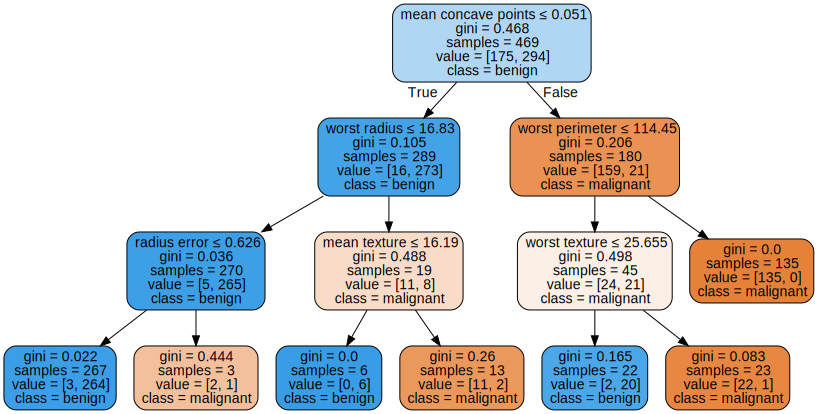

In [42]:
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=xtrain.columns,
                           class_names=target_names,
                           filled=True, rounded=True, 
                           special_characters=True)
graphviz.Source(dot_data)

## Análise e Exploração

In [62]:
x, y = utils.load_dataset('fraud')

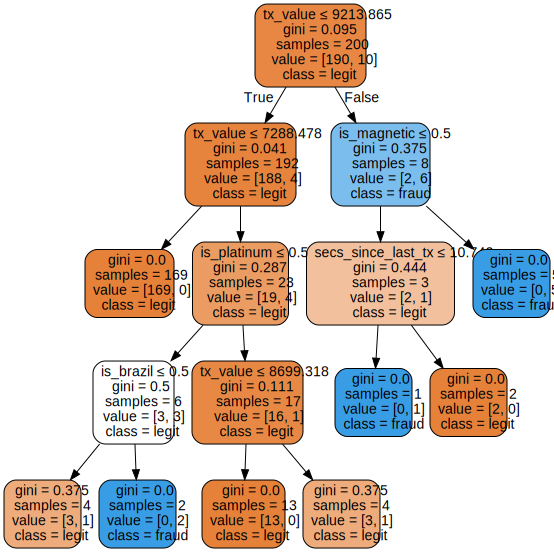

In [63]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x, y)

dot_data = export_graphviz(dt, out_file=None,
                           feature_names=x.columns,
                           class_names=['legit', 'fraud'],  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)
graphviz.Source(dot_data)

# Kaggle Competition

![Comp](../images/taxi-competition.png)

Vamos construir um modelo pra tentar prever quanto tempo uma viagem de taxi em NY vai levar. Depois vamos submeter nossa solução para o Kaggle.

Primeira coisa que devemos fazer é baixar os arquivos, descompactar e carregá-los no jupyter:

Vamos olhar rapidamente algumas características dos nossos dados:
- Quantos exemplos temos?
- Quantas features?
- Alguma variável não-numérica?

Vamos também ver se temos valores faltantes (null) na nossa base. A maioria dos algoritmos não saberá lidar com esses valores.

Separar nossas features do nosso target e reservar um conjunto de teste para avaliarmos nossos modelos:

Vamos ver a distruição do nosso target:

Antes de treinarmos nosso primeiro modelo, temos que tratar nossas variáveis não numéricas (vamos só ignorar por enquanto):

Agora vamos fazer nosso split para avaliar nossos modelos:

E rodar as predição e avaliar tanto no treino quanto no teste:

Antes de submeter, vamos usar a métrica oficial da competição para termos uma ideia de onde podemos nos colocar:

Bora criar uma submissão?

# FIM